In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('../')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Lauren's colors
L_colors = ['red', 'darkorange', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']
L_markers = ['s', '^', 'v', 'd', 'P']

In [2]:
# closure test? i.e. there is truth pythia data somewhere to compare to
closure = True

# define binnings
n_bins = [9, 9, 9] # WARNING RooUnfold seg faults if too many bins used
binning = [np.logspace(-5,0,10),np.logspace(-4,0,10),np.linspace(20,40,10)]
print(binning[0])
print(binning[1])
bincenters = [ get_log_bincenters(binning[0]), get_log_bincenters(binning[1]), get_lin_bincenters(binning[2]) ]
binwidths = [ get_binwidths(a) for a in binning ]

labels = ["energy weight", "$R_L$", "jet $p_T$"]

n_iter = 8

[1.00000000e-05 3.59381366e-05 1.29154967e-04 4.64158883e-04
 1.66810054e-03 5.99484250e-03 2.15443469e-02 7.74263683e-02
 2.78255940e-01 1.00000000e+00]
[1.00000000e-04 2.78255940e-04 7.74263683e-04 2.15443469e-03
 5.99484250e-03 1.66810054e-02 4.64158883e-02 1.29154967e-01
 3.59381366e-01 1.00000000e+00]


In [3]:
len(binning[1])

10

In [4]:
# file defs, hist imports

f_unfolded = ur.open("./unfolded_closure_new.root")
f_preunfold = ur.open("./preunfold_closure_new.root")

# Data, reco [theta_unknown_S]
h3_raw = f_preunfold["raw"]
h1_raw = f_preunfold["raw1D"]

# MC, reco [theta0_S]
h3_reco = f_preunfold["reco"]
h1_true = f_preunfold["reco1D"]

# MC, true [theta0_G]
h3_gen = f_preunfold["gen"]
h1_gen = f_preunfold["gen1D"]

# Data, true [theta_unknown_G]
if closure:
    h3_true = f_preunfold["true"]
    h1_true = f_preunfold["true1D"]

h3_unfolded = []
#h1_unfolded = [] TODO add in h1 unfolded support
for i in range(1,n_iter+1):
    h3_unfolded.append(f_unfolded["Baysian_Unfoldediter{}".format(i)])


In [5]:
proj = lambda a : np.array([projectionX(a.values()), projectionY(a.values()), projectionZ(a.values())]).T
proj_err = lambda a : np.array([projectionX(a.errors()), projectionY(a.errors()), projectionZ(a.errors())]).T

theta0_G = proj(h3_gen)
theta0_S = proj(h3_reco)
theta_unknown_G = proj(h3_true)
theta_unknown_S = proj(h3_raw)

theta_unfolded = [proj(a) for a in h3_unfolded]

theta0_G_err = proj_err(h3_gen)
theta0_S_err = proj_err(h3_reco)
theta_unknown_G_err = proj_err(h3_true)
theta_unknown_S_err = proj_err(h3_raw)

theta_unfolded_err = [proj_err(a) for a in h3_unfolded]


[2.800000e+01 1.640000e+02 6.840000e+02 3.966000e+03 2.736000e+04
 2.176040e+05 1.464718e+06 6.012250e+06 2.978560e+06]
(9, 3)
[1.00000000e-04 2.78255940e-04 7.74263683e-04 2.15443469e-03
 5.99484250e-03 1.66810054e-02 4.64158883e-02 1.29154967e-01
 3.59381366e-01 1.00000000e+00]
10
(array([2.800000e+01, 1.640000e+02, 6.840000e+02, 3.966000e+03,
       2.736000e+04, 2.176040e+05, 1.464718e+06, 6.012250e+06,
       2.978560e+06]), array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]), <BarContainer object of 9 artists>)
9
9


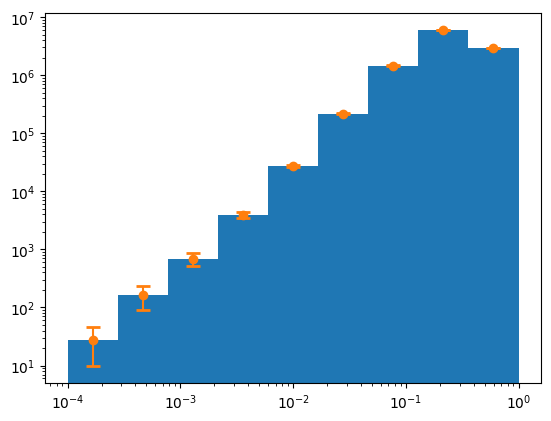

In [6]:
print(theta0_G[:,1])
print(theta0_G.shape)
print(binning[1])
print(len(binning[1]))

print(plt.hist(binning[1][:-1], binning[1], weights=theta0_G[:,1]))
print(len(binning[1][:-1]))
print(len(theta0_G_err[:,1]))
plt.errorbar(bincenters[1], theta0_G[:,1], yerr=theta0_G_err[:,1], capsize=5, capthick=2, fmt='o', linestyle="None")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [7]:
for iteration in range(n_iter):
    print(theta_unfolded[iteration][:,1])

[5.45833333e+00 2.15293569e+02 8.21768616e+02 5.55024176e+03
 3.81452816e+04 3.01070420e+05 1.97194640e+06 7.79246142e+06
 3.75552529e+06]
[4.72155444e+00 2.16511398e+02 7.88115895e+02 5.57056222e+03
 3.82446400e+04 3.02503435e+05 1.97720537e+06 7.80844928e+06
 3.76080764e+06]
[4.26215126e+00 2.23034897e+02 7.79135395e+02 5.59354188e+03
 3.82057918e+04 3.02616523e+05 1.97707399e+06 7.80949329e+06
 3.76232938e+06]
[3.95158056e+00 2.31912696e+02 7.84728551e+02 5.61681702e+03
 3.81683378e+04 3.02637063e+05 1.97665723e+06 7.80874459e+06
 3.76253694e+06]
[3.73262438e+00 2.41614527e+02 7.98707258e+02 5.63425245e+03
 3.81365433e+04 3.02661972e+05 1.97636640e+06 7.80816992e+06
 3.76242227e+06]
[3.57331866e+00 2.51366095e+02 8.17515840e+02 5.64497791e+03
 3.81094221e+04 3.02697016e+05 1.97622124e+06 7.80803149e+06
 3.76228959e+06]
[3.45422807e+00 2.60736417e+02 8.38911339e+02 5.65002576e+03
 3.80858972e+04 3.02738833e+05 1.97619247e+06 7.80828068e+06
 3.76222189e+06]
[3.36296608e+00 2.69479152e

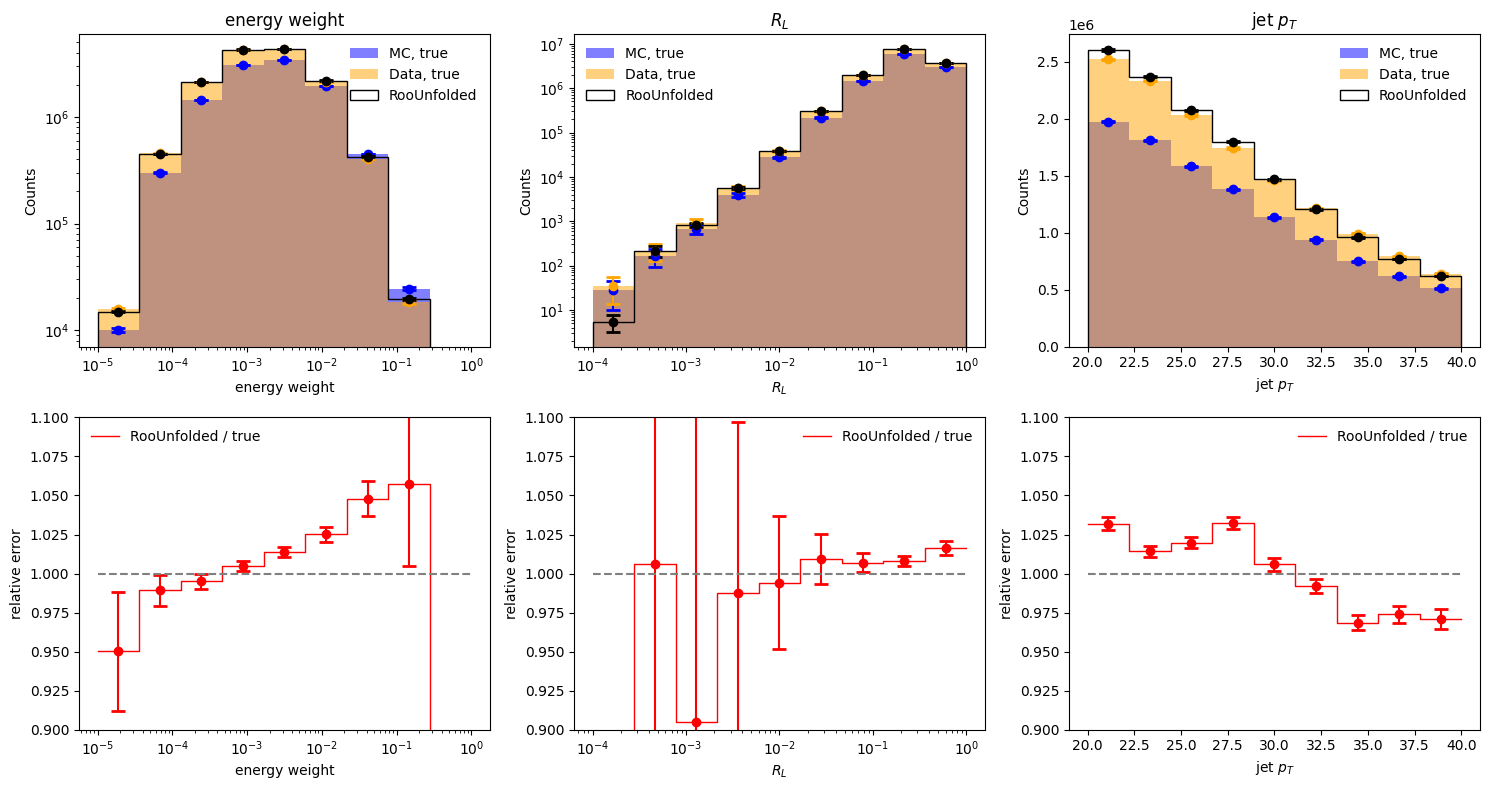

In [8]:
############################## UNFOLDED DISTRIBUTIONS ############################
# individual distros

for iteration in range(1):
    fig, axes = plt.subplots(2, 3, figsize=(15,8))

    # ROW 1: raw distributions
    for i in range(3):
        ax = axes[0, i]

        _,_,_=ax.hist(binning[i][:-1], binning[i], weights=theta0_G[:,i],color='blue', alpha=0.5, label="MC, true")
        _,_,_=ax.hist(binning[i][:-1], binning[i], weights=theta_unknown_G[:,i],color='orange',alpha=0.5,label="Data, true")
        _,_,_=ax.hist(binning[i][:-1], binning[i],weights=theta_unfolded[iteration][:,i],color='black',histtype="step",label="RooUnfolded",lw=1)

        ax.errorbar(bincenters[i], theta0_G[:,i], yerr=theta0_G_err[:,i], capsize=5, capthick=2, fmt='o', linestyle="None", color='blue')
        ax.errorbar(bincenters[i], theta_unknown_G[:,i], yerr=theta_unknown_G_err[:,i], capsize=5, capthick=2, fmt='o', linestyle="None", color='orange')
        ax.errorbar(bincenters[i], theta_unfolded[iteration][:,i], yerr=theta_unfolded_err[iteration][:,i], capsize=5, capthick=2, fmt='o', linestyle="None", color='black')
        
        ax.set_title(labels[i])
        ax.set_xlabel(labels[i])
        ax.set_ylabel("Counts")
        ax.legend(frameon=False)

        if i in [0, 1]:
            ax.set_xscale('log')
            ax.set_yscale('log')
            #ax.set_ylim([0.1, 4E8])
    
    # ROW 2: residual plots
    for i in range(3):
        ax = axes[1, i]
        
        yvals, yerrs = get_ratio_safe(theta_unfolded[iteration][:,i], theta_unknown_G[:,i], \
                                      numerr=theta_unfolded_err[iteration][:,i], denomerr=theta_unknown_G_err[:,i])
        
        ax.step(binning[i], np.insert(yvals, 0, yvals[0]), where="pre",color='red',label="RooUnfolded / true",lw=1)
        ax.errorbar(bincenters[i], yvals, yerr=yerrs, capsize=5, capthick=2, fmt='o', linestyle="None", color='red')

        ax.hlines(y=1, xmin=binning[i][0], xmax=binning[i][len(binning[i])-1], color='grey', linestyle='--')

        ax.set_xlabel(labels[i])
        ax.set_ylabel("relative error")
        ax.legend(frameon=False)
        
        if i in [0, 1]:
            ax.set_xscale('log')
            ax.set_ylim([0.9, 1.1])
        else:
            ax.set_ylim([0.9, 1.1])

    
    fig.tight_layout()
    # fig.savefig("post_training_" + str(iteration) + ".png")
    # fig.show()
    # plt.close()
plt.show()

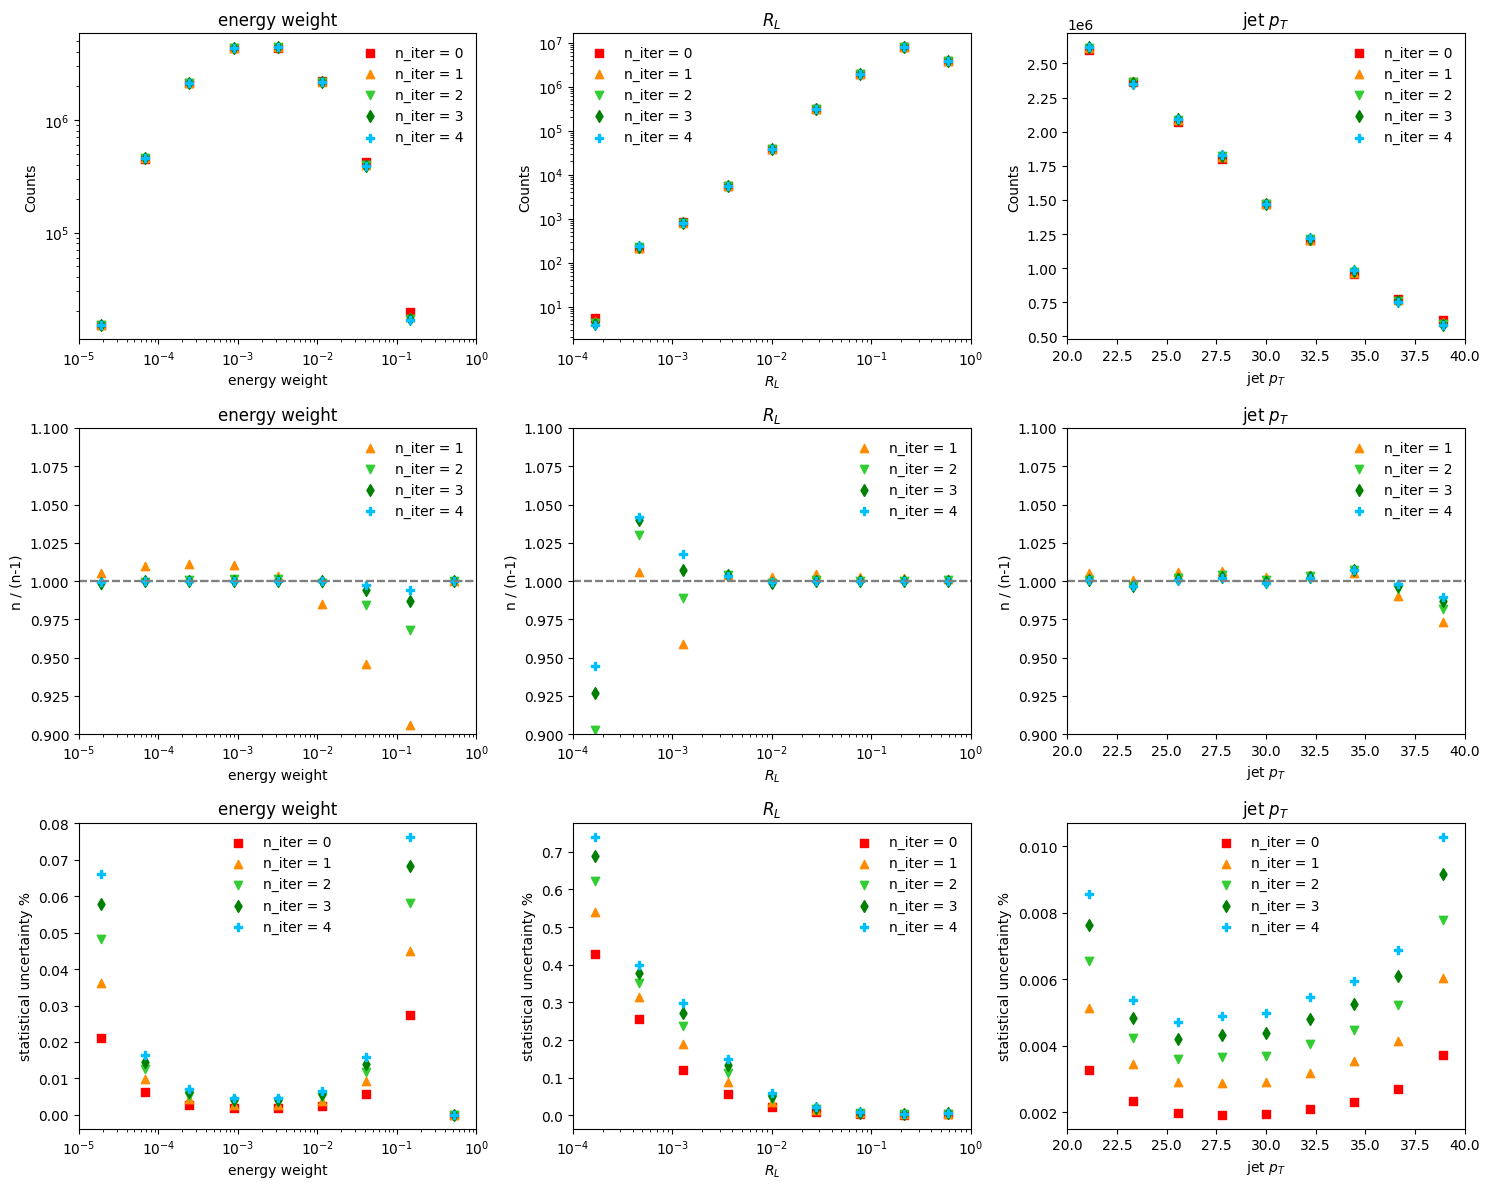

In [9]:
############################## UNFOLDED DISTRIBUTIONS ############################
# individual distros

it = 5

fig, axes = plt.subplots(3, 3, figsize=(15,12))

# ROW 1: raw distributions
for i in range(3):
    ax = axes[0, i]

    for iteration in range(it):
        ax.scatter(bincenters[i], theta_unfolded[iteration][:,i],color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)
        ax.set_ylabel("Counts")

        #ax.errorbar(bincenters[i], theta_unfolded[iteration][:,i], yerr=theta_unfolded_err[iteration][:,i], capsize=5, capthick=2, fmt='o', linestyle="None", color=L_colors[iteration])
        
        ax.set_title(labels[i])
        ax.set_xlabel(labels[i])
        
        ax.legend(frameon=False)

        if i in [0, 1]:
            ax.set_xscale('log')
            ax.set_yscale('log')
            #ax.set_ylim([0.1, 4E8])
        ax.set_xlim([binning[i][0], binning[i][len(binning[i])-1]])


# ROW 2: convergence plot (n / n - 1)
for i in range(3):
    ax = axes[1, i]

    for iteration in range(1,it):
    
        yvals = safe_divide(theta_unfolded[iteration][:,i] , theta_unfolded[iteration-1][:,i], filler=1)
        ax.scatter(bincenters[i], yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

        ax.hlines(y=1, xmin=binning[i][0], xmax=binning[i][len(binning[i])-1], color='grey', linestyle='--')

        ax.set_title(labels[i])
        ax.set_xlabel(labels[i])
        ax.set_ylabel("n / (n-1)")
        ax.legend(frameon=False)

        if i in [0, 1]:
            ax.set_xscale('log')
        ax.set_ylim([0.9, 1.1])
        ax.set_xlim([binning[i][0], binning[i][len(binning[i])-1]])


# ROW 3: statistical error %
for i in range(3):
    ax = axes[2, i]

    for iteration in range(it):
        
        yvals = safe_divide(theta_unfolded_err[iteration][:,i], theta_unfolded[iteration][:,i])
        ax.scatter(bincenters[i], yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

        ax.set_title(labels[i])
        ax.set_xlabel(labels[i])
        ax.set_ylabel("statistical uncertainty %")
        ax.legend(frameon=False)

        if i in [0, 1]:
            ax.set_xscale('log')
        ax.set_xlim([binning[i][0], binning[i][len(binning[i])-1]])


fig.tight_layout()
plt.show()

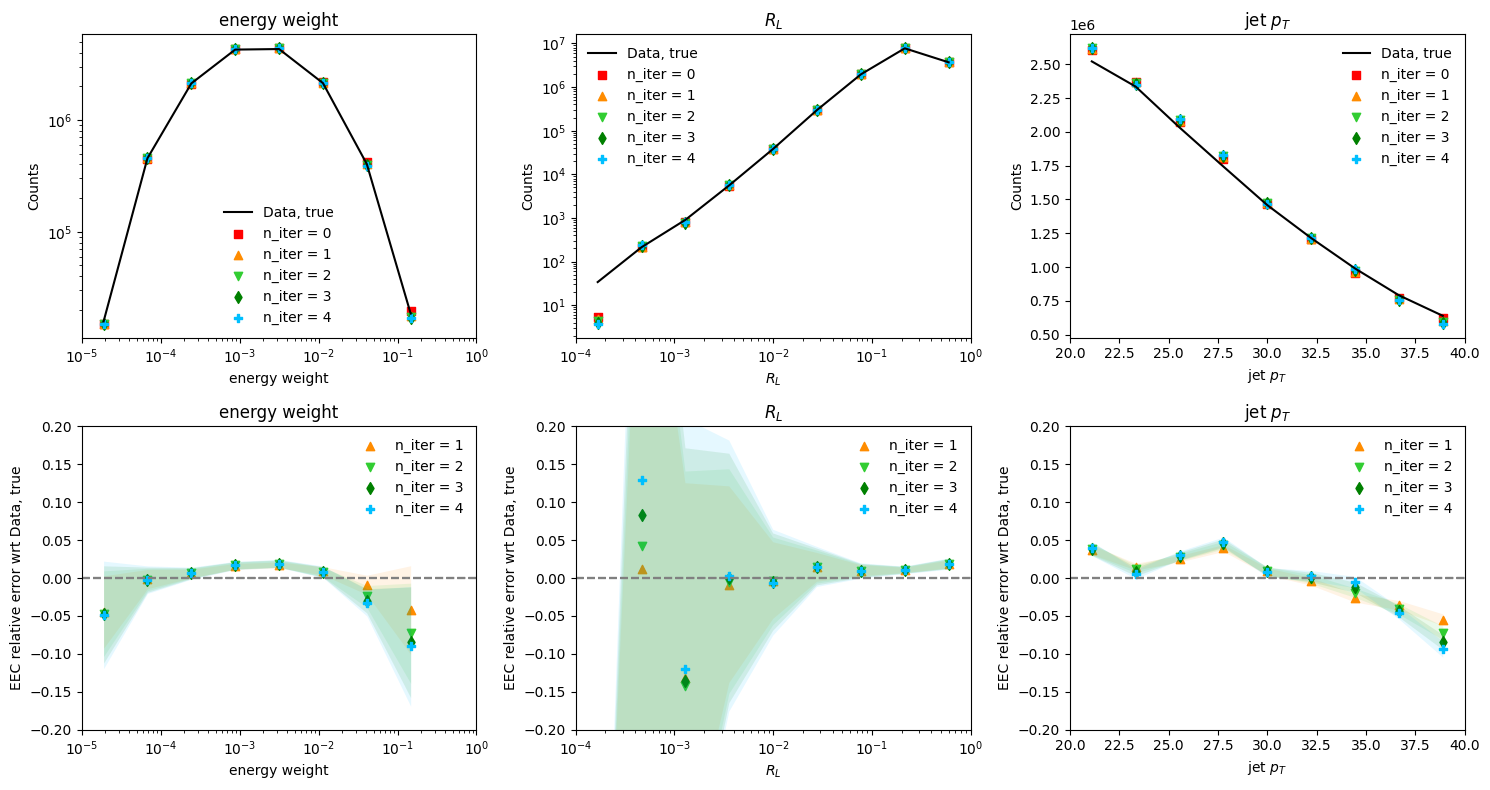

In [10]:
############################## UNFOLDED DISTRIBUTIONS ############################
# individual distros

it = 5

fig, axes = plt.subplots(2, 3, figsize=(15,8))

# ROW 1: raw distributions
for i in range(3):
    ax = axes[0, i]

    if i == 0:
        ax.plot(bincenters[i][:-1], theta_unknown_G[:,i][:-1], color='black',label="Data, true")
    else:
        ax.plot(bincenters[i], theta_unknown_G[:,i], color='black',label="Data, true")

    for iteration in range(it):
        ax.scatter(bincenters[i], theta_unfolded[iteration][:,i],color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)
        ax.set_ylabel("Counts")

        #ax.errorbar(bincenters[i], theta_unfolded[iteration][:,i], yerr=theta_unfolded_err[iteration][:,i], capsize=5, capthick=2, fmt='o', linestyle="None", color=L_colors[iteration])
        
        ax.set_title(labels[i])
        ax.set_xlabel(labels[i])
        
        ax.legend(frameon=False)

        if i in [0, 1]:
            ax.set_xscale('log')
            ax.set_yscale('log')
            #ax.set_ylim([0.1, 4E8])
        ax.set_xlim([binning[i][0], binning[i][len(binning[i])-1]])


# ROW 2: error wrt Data, true
for i in range(3):
    ax = axes[1, i]

    for iteration in range(1,it):

        yvals, yerrs = get_ratio_safe(theta_unfolded[iteration][:,i], theta_unknown_G[:,i], \
                                      numerr=theta_unfolded_err[iteration][:,i], denomerr=theta_unknown_G_err[:,i])
        yvals = yvals - 1

        ax.scatter(bincenters[i], yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

        if i == 0:
            ax.fill_between(bincenters[i][:-1], (yvals-yerrs)[:-1], (yvals+yerrs)[:-1], alpha=0.1, edgecolor=L_colors[iteration], facecolor=L_colors[iteration], linewidth=0)
        else:
            ax.fill_between(bincenters[i], yvals-yerrs, yvals+yerrs, alpha=0.1, edgecolor=L_colors[iteration], facecolor=L_colors[iteration], linewidth=0)

        ax.hlines(y=0, xmin=binning[i][0], xmax=binning[i][len(binning[i])-1], color='grey', linestyle='--')

        ax.set_title(labels[i])
        ax.set_xlabel(labels[i])
        ax.set_ylabel("EEC relative error wrt Data, true")
        ax.legend(frameon=False)

        if i in [0, 1]:
            ax.set_xscale('log')
        ax.set_ylim([-0.2, 0.2])
        ax.set_xlim([binning[i][0], binning[i][len(binning[i])-1]])

fig.tight_layout()
plt.show()


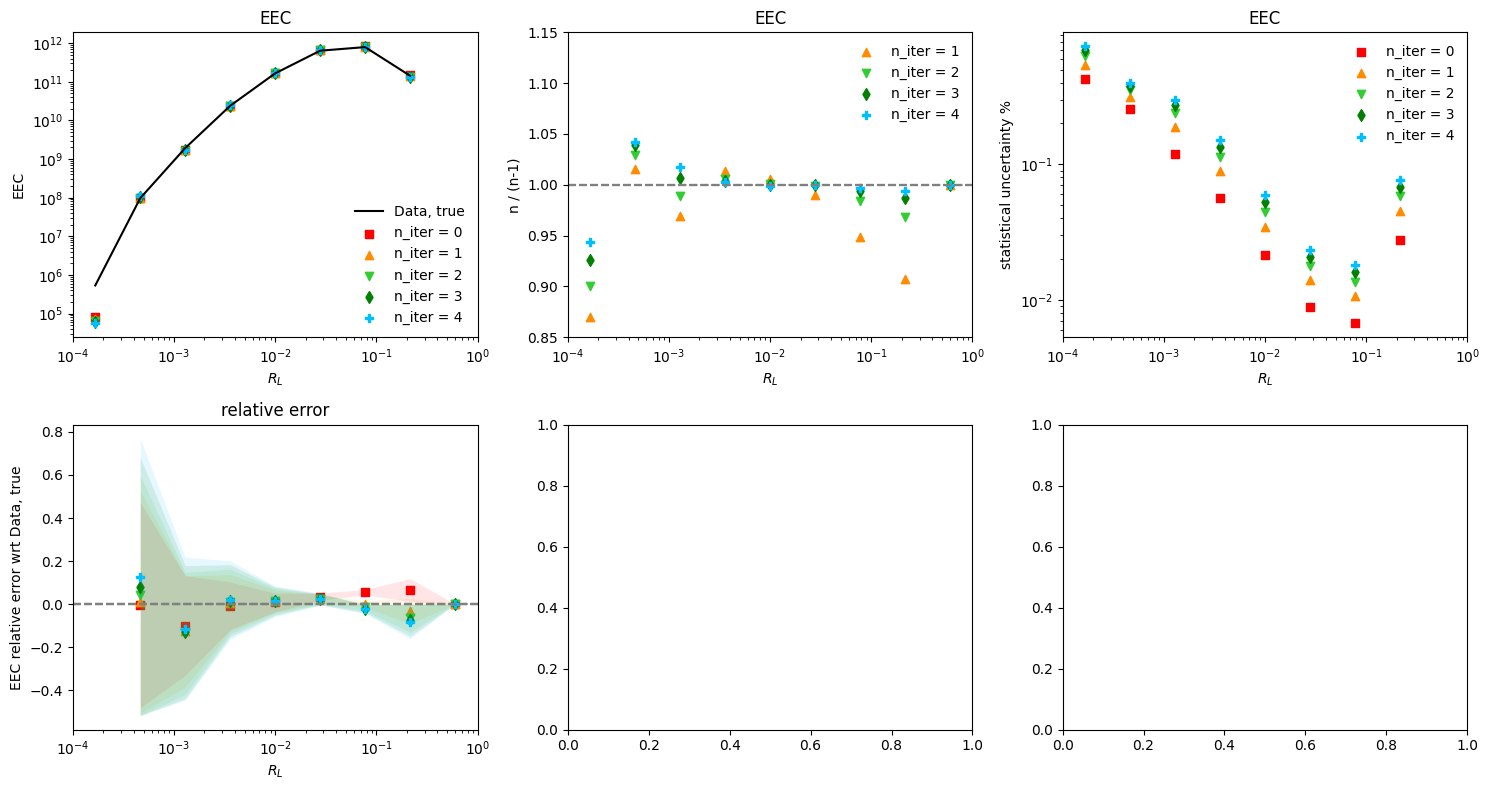

In [11]:
############################## UNFOLDED DISTRIBUTIONS ############################
# EEC distros

it = 5

fig, axes = plt.subplots(2, 3, figsize=(15,8))

rl_lims = ax.set_xlim([binning[1][0], binning[1][len(binning[1])-1]])

true_EEC = theta_unknown_G[:,1]*theta_unknown_G[:,0]
true_EEC_err = get_err_ab(theta_unknown_G[:,1], theta_unknown_G[:,0], theta_unknown_G_err[:,1], theta_unknown_G_err[:,0])
unfolded_EEC = [theta_unfolded[iteration][:,1]*theta_unfolded[iteration][:,0] for iteration in range(len(theta_unfolded))]
unfolded_EEC_err = [ get_err_ab(theta_unfolded[iteration][:,1],theta_unfolded[iteration][:,0], \
                                theta_unfolded_err[iteration][:,1],theta_unfolded_err[iteration][:,0]) \
                                    for iteration in range(len(theta_unfolded_err))]

# COL 1: raw EEC distribution WITH relative error over data, true underneath
ax = axes[0, 0]

ax.plot(bincenters[1][:-1], true_EEC[:-1], color='black',label="Data, true")

for iteration in range(it):

    ax.scatter(bincenters[1], unfolded_EEC[iteration],color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)
    ax.set_ylabel("EEC")
    
    ax.set_title("EEC")
    ax.set_xlabel(labels[1])

    ax.legend(frameon=False)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(rl_lims)

# row below with the error

ax = axes[1, 0]

ax.hlines(y=0, xmin=binning[1][0], xmax=binning[1][len(binning[1])-1], color='grey', linestyle='--')

for iteration in range(it):

    yvals, yerrs = get_ratio_safe(unfolded_EEC[iteration], true_EEC, \
                                      numerr=unfolded_EEC_err[iteration], denomerr=true_EEC_err, filler=1)
    yvals = yvals - 1

    ax.scatter(bincenters[1][1:], yvals[1:], color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.fill_between(bincenters[1][1:], (yvals-yerrs)[1:], (yvals+yerrs)[1:], alpha=0.1, edgecolor=L_colors[iteration], facecolor=L_colors[iteration], linewidth=0)

    ax.hlines(y=0, xmin=binning[1][0], xmax=binning[1][len(binning[1])-1], color='grey', linestyle='--')
    

    ax.set_title("relative error")
    ax.set_xlabel(labels[1])
    ax.set_ylabel("EEC relative error wrt Data, true")

    ax.set_xscale('log')
    #ax.set_ylim([-0.3, 0.3])
    ax.set_xlim(rl_lims)


# COL 2: convergence plot (n / n - 1)
ax = axes[0, 1]

for iteration in range(1,it):

    yvals = safe_divide(unfolded_EEC[iteration], unfolded_EEC[iteration-1], filler=1)
    ax.scatter(bincenters[1], yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.hlines(y=1, xmin=binning[1][0], xmax=binning[1][len(binning[1])-1], color='grey', linestyle='--')

    ax.set_title("EEC")
    ax.set_xlabel(labels[1])
    ax.set_ylabel("n / (n-1)")
    ax.legend(frameon=False)

    ax.set_xscale('log')
    ax.set_ylim([0.85, 1.15])
    ax.set_xlim(rl_lims)


# COL 3: statistical error %
ax = axes[0, 2]

for iteration in range(it):
    
    yvals = safe_divide(unfolded_EEC_err[iteration], unfolded_EEC[iteration])
    ax.scatter(bincenters[1], yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.set_title("EEC")
    ax.set_xlabel(labels[1])
    ax.set_ylabel("statistical uncertainty %")
    ax.legend(frameon=False)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(rl_lims)


fig.tight_layout()
plt.show()
